In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import  log,sqrt,exp
from scipy.stats import norm

class Options:

    class call:
            
        def __init__(self):
            self.X=np.arange(0,2*E,0.001)

        def call(self,S=None, K=None, T=1, t=0, sigma=0.3, r=0.1, q=0):
            d1 = (log(S/K)+(r-q+sigma*sigma/2)*(T-t))/(sigma*sqrt(T-t))
            d2 = d1 - sigma*sqrt(T-t)
            self.price =  S*exp(-q*(T-t))*norm.cdf(d1) - K*exp(-r*(T-t))*norm.cdf(d2)
            return self.price

        def buy(self,E,price = None ,S=None,  T=1, t=0, sigma=0.3, r=0.1, q=0):
            if(price is None):
                price = self.call(S, E, T, t, sigma, r, q)
            L=[]
            for x in self.X:
                if(x<=E):
                    L.append(-price)
                else:
                    L.append(x-E-price)
            self.L=np.array(L)

        def sell(self,E, price = None ,S=None, T=1, t=0, sigma=0.3, r=0.1, q=0):
            if(price is None):
                price = self.call(S, E, T, t, sigma, r, q)

            L=[]
            for x in self.X:
                if(x<=E):
                    L.append(price)
                else:
                    L.append(price+E-x)
            self.L=np.array(L)

        def get_profit(self):
            return self.L
        
        def get_price(self,St):
            for i in range(1,len(self.X)):   
                   if(self.X[i-1] <= St and self.X[i] >= St):
                        return self.L[i]
            
    class put:
            
        def __init__(self):
            self.X=np.arange(0,2*E,0.001)
            
        def put(self,S=None, K=None, T=1, t=0, sigma=0.3, r=0.1, q=0):
            d1 = (log(S/K)+(r-q+sigma*sigma/2)*(T-t))/(sigma*sqrt(T-t))
            d2 = d1 - sigma*sqrt(T-t)
            self.price = -S*exp(-q*(T-t))*norm.cdf(-d1) + K*exp(-r*(T-t))*norm.cdf(-d2)
            return self.price

        def buy(self,E,price = None, S=None, T=1, t=0, sigma=0.3, r=0.1, q=0):
            if(price is None):
                price = self.put(S, E, T, t, sigma, r, q)

            L=[]
            for x in self.X:
                if(x<=E):
                    L.append(E-x-price)
                else:
                    L.append(-price)
            self.L=np.array(L)

        def sell(self,E,price = None ,S=None,T=1, t=0, sigma=0.3, r=0.1, q=0):
            if(price is None):
                price = self.put(S, E, T, t, sigma, r, q)
        
            L=[]
            for x in self.X:
                if(x<=E):
                    L.append(x-E-price)
                else:
                    L.append(-price)
            self.L=np.array(L)
        
        def get_profit(self):
            return self.L
        
        def get_price(self,St):
            for i in range(1,len(self.X)):   
                   if(self.X[i-1] <= St and self.X[i] >= St):
                        return self.L[i]

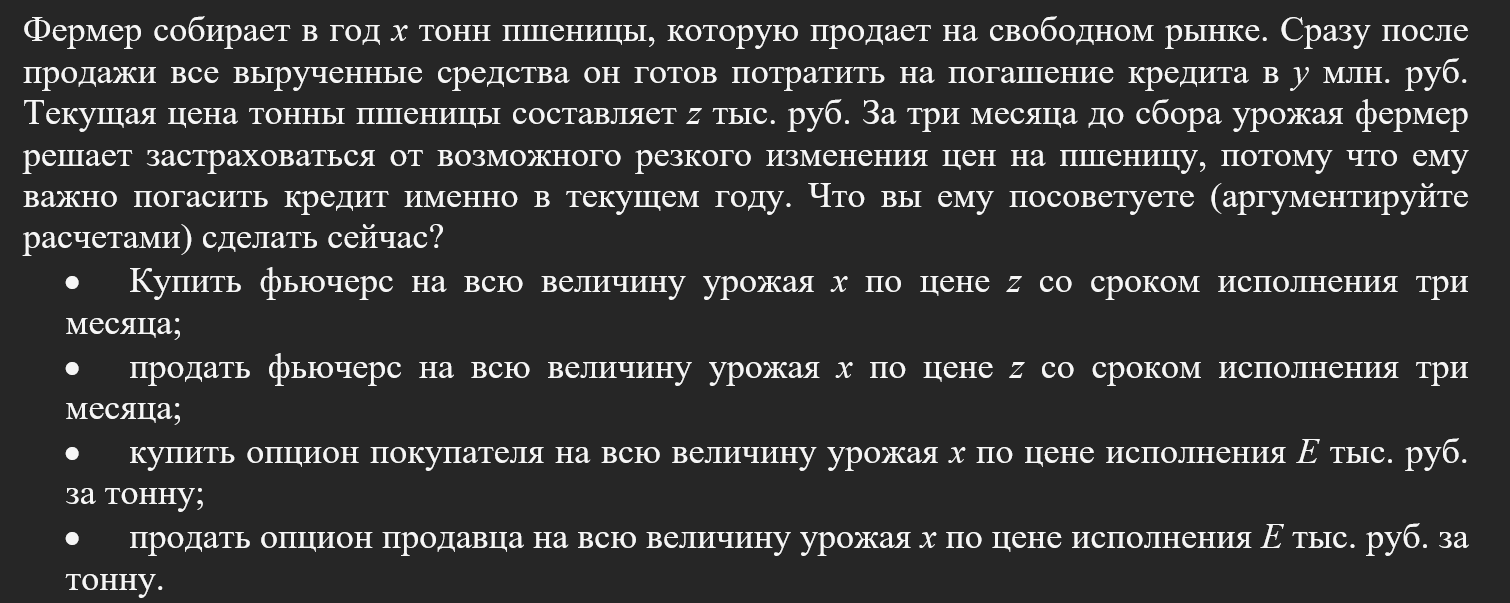

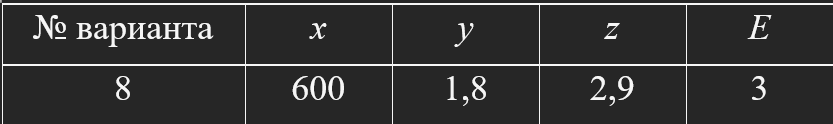

In [12]:
x=600
y=1800000
z=2900

In [13]:
x*z

1740000

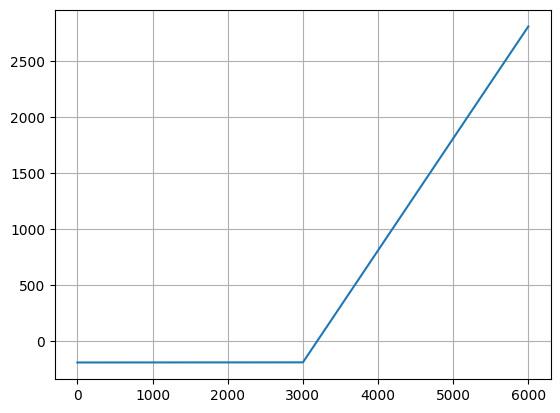

-113337.10362985957

In [14]:
T = 3/12
S0 = 2900
n=600
E=3000
r = 0.12
sigma = 0.3

opt1 = Options.call()

opt1.buy(E=E,T=T,S=S0,r=0.18,sigma=0.3,q=0,t=0)
X=np.arange(0,2*E,0.001)

plt.grid()
plt.plot(X,opt1.get_profit() )

plt.show()
n*opt1.get_price(2900)


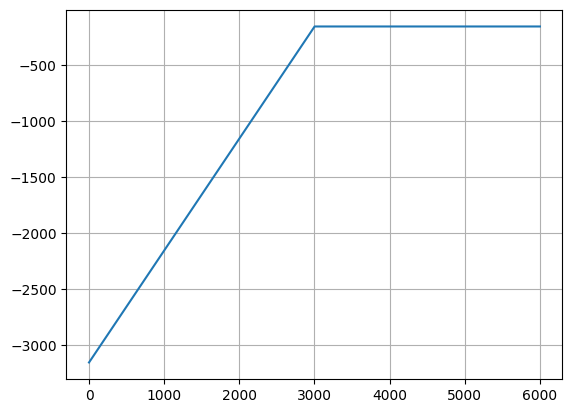

-256.8876

In [15]:
T = 3/12
S0 = 2900
n=600
E=3000
r = 0.12
sigma = 0.3
opt1 = Options.put()
opt1.sell(E=E,T=T,S=S0,r=0.18,sigma=0.3,q=0,t=0)
X=np.arange(0,2*E,0.001)
plt.grid()
plt.plot(X,opt1.get_profit() )
plt.show()
round(opt1.get_price(2900),4)
